In [380]:
import pandas as pd
import glob
import re
def get_file_list(path):
    txtfiles = []
    for file in glob.glob(f"{path}/*.txt"):
        txtfiles.append(file)
    return txtfiles

def get_year_from_filepath(filepath):
    x = re.search("(\d+).txt", filepath)
    if len(x.groups()) > 0:
        return x.groups()[0]
    return None


def year_to_filepath(year):
    return f"Names/yob{year}.txt"

Dùng Pandas đọc và tổng hợp dữ liệu của các năm

In [381]:
txtfiles = get_file_list("./Names")
print(txtfiles)
df = pd.read_csv(txtfiles[0], sep=",", names=["name", "sex", "number"])

['./Names/yob2000.txt', './Names/yob2014.txt', './Names/yob1938.txt', './Names/yob1910.txt', './Names/yob1904.txt', './Names/yob1905.txt', './Names/yob1911.txt', './Names/yob1939.txt', './Names/yob2015.txt', './Names/yob2001.txt', './Names/yob2017.txt', './Names/yob2003.txt', './Names/yob1907.txt', './Names/yob1913.txt', './Names/yob1898.txt', './Names/yob1899.txt', './Names/yob1912.txt', './Names/yob1906.txt', './Names/yob2002.txt', './Names/yob2016.txt', './Names/yob2012.txt', './Names/yob2006.txt', './Names/yob1902.txt', './Names/yob1916.txt', './Names/yob1889.txt', './Names/yob1888.txt', './Names/yob1917.txt', './Names/yob1903.txt', './Names/yob2007.txt', './Names/yob2013.txt', './Names/yob2005.txt', './Names/yob2011.txt', './Names/yob1915.txt', './Names/yob1901.txt', './Names/yob1929.txt', './Names/yob1928.txt', './Names/yob1900.txt', './Names/yob1914.txt', './Names/yob2010.txt', './Names/yob2004.txt', './Names/yob1973.txt', './Names/yob1967.txt', './Names/yob1998.txt', './Names/y

In [382]:
data_by_year = None
for file in txtfiles:
    year = get_year_from_filepath(file)
    data = pd.read_csv(file, sep=",", names=["name", "sex", "number"])
    data["year"] = int(year)

    if data_by_year is None:
        data_by_year = data
    else:
        data_by_year = pd.concat([data_by_year,data])

data_by_year


,name,sex,number,year
0,Emily,F,25956,2000
1,Hannah,F,23082,2000
2,Madison,F,19968,2000
3,Ashley,F,17997,2000
4,Sarah,F,17702,2000
...,...,...,...,...
9032,Winfrey,M,5,1935
9033,Yancy,M,5,1935
9034,Yazzie,M,5,1935
9035,Zaragoza,M,5,1935


- Vẽ biểu đồ tổng số trẻ em sinh ra theo giới tính và năm (Total births by sex and year)

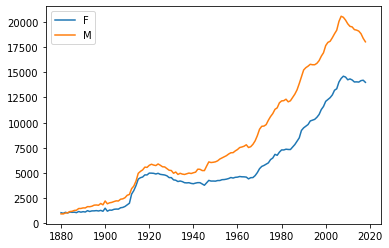

In [383]:
import matplotlib.pyplot as plt
sex_by_year = data_by_year.groupby(["year","sex"])["sex"].count().reset_index(name="count")
sex_by_year = pd.merge(sex_by_year[sex_by_year.sex == 'F'], sex_by_year[sex_by_year.sex == 'M'], on="year", suffixes=["_M", "_F"])

plt.plot(sex_by_year["year"], sex_by_year["count_F"], label = "F")
plt.plot(sex_by_year["year"], sex_by_year["count_M"], label = "M")

plt.legend()
plt.show()





Tạo subset gồm top 1000 cái tên phổ biến mỗi năm theo từng loại giới tính

In [384]:

import numpy as np
years = data_by_year["year"].unique()
years = np.sort(years)
name_count_by_year = data_by_year.groupby(["year","name", "sex"])["name"].count().reset_index(name="count")


In [385]:

def get_popular_name_by_year(year, name_count_by_year):
    
    name_count_by_year[name_count_by_year.year == year].sort_values(by=['count'], ascending=False)
    name_count_by_year_M = name_count_by_year[name_count_by_year.sex == "M"][name_count_by_year.year == year]
    name_count_by_year_F = name_count_by_year[name_count_by_year.sex == "F"][name_count_by_year.year == year]
    
    
    name_count_by_year_F = name_count_by_year_F.sort_values(by=['count'], ascending=False).head(1000)["name"]
    name_count_by_year_M = name_count_by_year_M.sort_values(by=['count'], ascending=False).head(1000)["name"]
    df = pd.DataFrame(list(name_count_by_year_F), columns=[f"F_{year}"])
    df = pd.concat([df, pd.DataFrame(list(name_count_by_year_M), columns=[f"M_{year}"])],axis=1)
    return df


popular_names_by_year = None

for year in years:
    df = get_popular_name_by_year(year=year,name_count_by_year=name_count_by_year)
    if popular_names_by_year is None:
        popular_names_by_year = df
    else:
        popular_names_by_year = pd.concat([popular_names_by_year, df], axis=1)

popular_names_by_year

/Users/toan/.pyenv/versions/3.7.9/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/toan/.pyenv/versions/3.7.9/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


,F_1880,M_1880,F_1881,M_1881,F_1882,M_1882,F_1883,M_1883,F_1884,M_1884,...,F_2014,M_2014,F_2015,M_2015,F_2016,M_2016,F_2017,M_2017,F_2018,M_2018
0,Abbie,Aaron,Abbie,Aaron,Abbie,Aaron,Abbie,Aaron,Abbie,Aaron,...,Aabha,Aaban,Aabha,Aaban,Aabha,Aaban,Aabriella,Aaban,Aabidah,Aaban
1,Margarett,Merritt,Margarett,Melville,Lula,Mattie,Manie,Lucien,Margret,Merle,...,Maribeth,Melchizedek,Markia,Meilech,Marybel,Miccah,Maryelle,Micai,Maryem,Metin
2,Mame,Mathias,Malvina,Marvin,Manuela,Maynard,Manuela,Martha,Mathilda,Micheal,...,Maribella,Meilech,Markenzie,Mehaan,Maryjane,Messiyah,Maryiah,Messias,Maryjane,Meshilem
3,Mamie,Matt,Mame,Mary,Marcella,May,Marcella,Martin,Mary,Michael,...,Maribell,Meir,Markella,Mehan,Maryiah,Mete,Marygrace,Messiyah,Maryiah,Mesiah
4,Mammie,Matthew,Mamie,Mason,Marcia,Maxwell,Marcia,Marvin,Martina,Mervin,...,Maribel,Mekael,Markayla,Mehar,Maryhelen,Meyer,Maryfrances,Mete,Marygrace,Mesias
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,NaN,Everette,NaN,Ervin,Evelyn,Emilio,Evelina,Fletcher,Irma,Egbert,...,Malarie,Nyxon,Mamie,Nussen,Marci,Omar,Maram,Oryn,Makhyla,Obi
996,NaN,Evert,NaN,Zeb,Evelina,Elias,Eveline,Florence,Iris,Elgie,...,Malaysia,Nyzaiah,Mame,Nyair,Mar,Om,Maraki,Oryon,Makenzi,Obie
997,NaN,Ezekiel,NaN,NaN,Erna,Eli,Evelyn,Ernst,Irene,Eldridge,...,Malayshia,Nyziah,Mama,Nyaire,Marai,Nyzier,Mara,Osa,Makhia,Obinna
998,NaN,Ezra,NaN,NaN,Etta,Eldridge,Evie,Ernest,Ira,Eldon,...,Malaysha,Nyzier,Malysia,Nyan,Marah,Odyn,Maraiya,Oluwaseun,Makhari,Obrian


Vẽ biểu đồ số lượng các bé sinh theo năm có các tên sau: Philip, Harry, Elizabeth, Marilyn

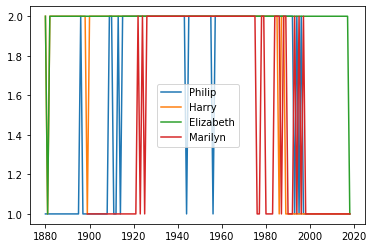

In [395]:


def plot_chart_name_by_year(name):
    name_by_year = data_by_year[data_by_year.name == name].groupby(["year","name"])["name"].count().reset_index(name="count")
    plt.plot(name_by_year["year"], name_by_year["count"], label = name)

names = ["Philip", "Harry", "Elizabeth", "Marilyn"]
for name in names:
    plot_chart_name_by_year(name)
plt.legend()
plt.show()